In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display
import librosa
import random
import librosa.display
from datetime import datetime

In [2]:
audio_path = r'output.mp3'

# sr - sampling rate
y, sr = librosa.load(audio_path, sr=None)

/Users/yermandy/python/miniconda3/envs/dev/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [3]:
print(len(y))
print(sr)

91170576
44100


In [4]:
csv = r'data/20210604_173354_20190819-Kutna Hora-L4-out-MVI_0040.MP4.csv'
csv = np.loadtxt(csv, delimiter=';', skiprows=1, dtype=str)

cars = {}
for row in csv:
    if row[9] != '':
        cars[row[0]] = (row[8], row[9])

In [5]:
# time = datetime.strptime('00:00:06.440', '%H:%M:%S.%f')
# millisec = dt_obj.timestamp() * 1000
# millisec
# start_time = time.second + time.microsecond / 1e6

<Figure size 1296x432 with 0 Axes>

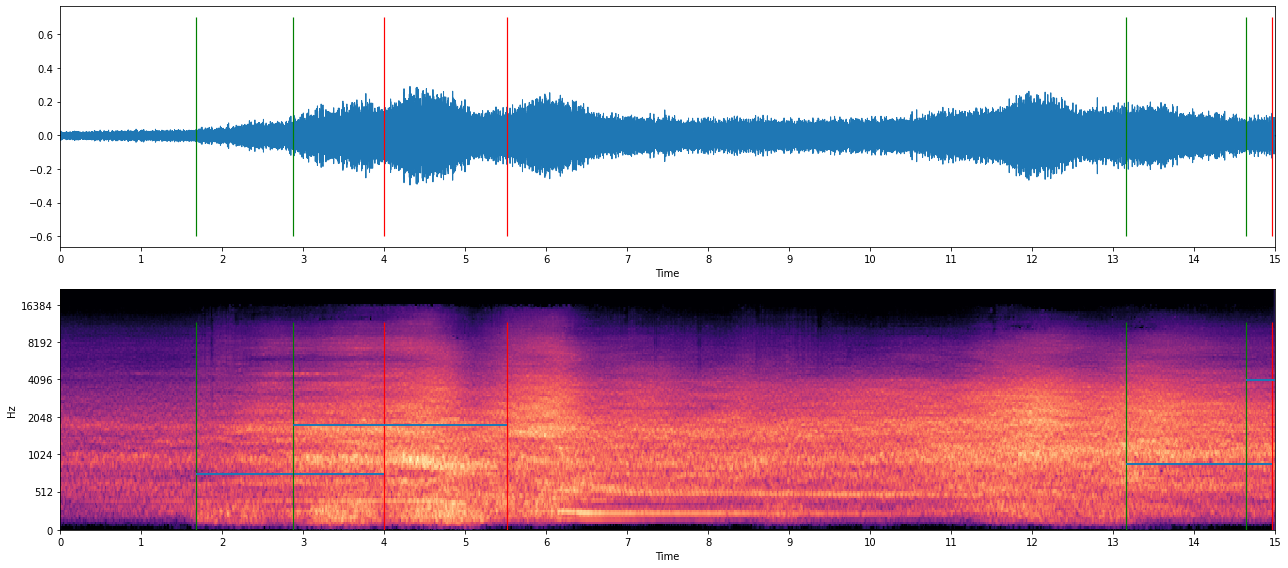

In [24]:
from_minute, from_second = 20, 20

to_minute, to_second = 20, 35


from_time = from_minute * 60 + from_second
till_time = to_minute * 60 + to_second

y1 = y[sr * from_time : sr * till_time]

plt.figure(figsize=(18, 6))
fig, axs = plt.subplots(figsize=(18, 8), nrows=2)

y_harmonic, y_percussive = librosa.effects.hpss(y1)

# librosa.display.waveplot(y1, sr=sr, ax=axs[0])
librosa.display.waveplot(y_harmonic, sr=sr, ax=axs[0])
# librosa.display.waveplot(y_percussive, sr=sr, ax=axs[0])

S = librosa.feature.melspectrogram(y1, sr=sr, n_mels=128)
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# log_S = librosa.power_to_db(S, ref=np.max)
log_S = librosa.power_to_db(S_harmonic, ref=np.max)
# log_S = librosa.power_to_db(S_percussive, ref=np.max)

librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel', ax=axs[1])

for ax in axs.flat:
    ax.set_xticks(range(till_time - from_time + 1))
#     ax.set_xticklabels(range(from_time, till_time + 1))

for car in cars.values():
    start_time = car[0]
    start_time = datetime.strptime(start_time, '%H:%M:%S.%f')
    start_time = start_time.minute * 60 + start_time.second + start_time.microsecond / 1e6
    start_time -= from_time
    plt.vlines(start_time, 0, 12000, colors='green', linewidth=1.2, linestyle='-')
    axs[0].vlines(start_time, -0.6, 0.7, colors='green', linewidth=1.2, linestyle='-')
    
    end_time = car[1]
    end_time = datetime.strptime(end_time, '%H:%M:%S.%f')
    end_time = end_time.minute * 60 + end_time.second + end_time.microsecond / 1e6
    end_time -= from_time
    plt.vlines(end_time, 0, 12000, colors='red', linewidth=1.2, linestyle='-')
    axs[0].vlines(end_time, -0.6, 0.7, colors='red', linewidth=1.2, linestyle='-')
    
    plt.hlines(random.randint(512, 4096), start_time, end_time, linewidth=2)

plt.tight_layout();

In [19]:
IPython.display.Audio(data=y[sr * from_time : sr * till_time], rate=sr)

In [8]:
S = librosa.stft(y1, n_fft=2048, hop_length=512)

In [9]:
y2 = np.abs(S) ** 2
y2 = librosa.power_to_db(y2, ref=np.max)

In [10]:
def plot_spectrogram(Y, sr, hop_length, y_axis="log"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")


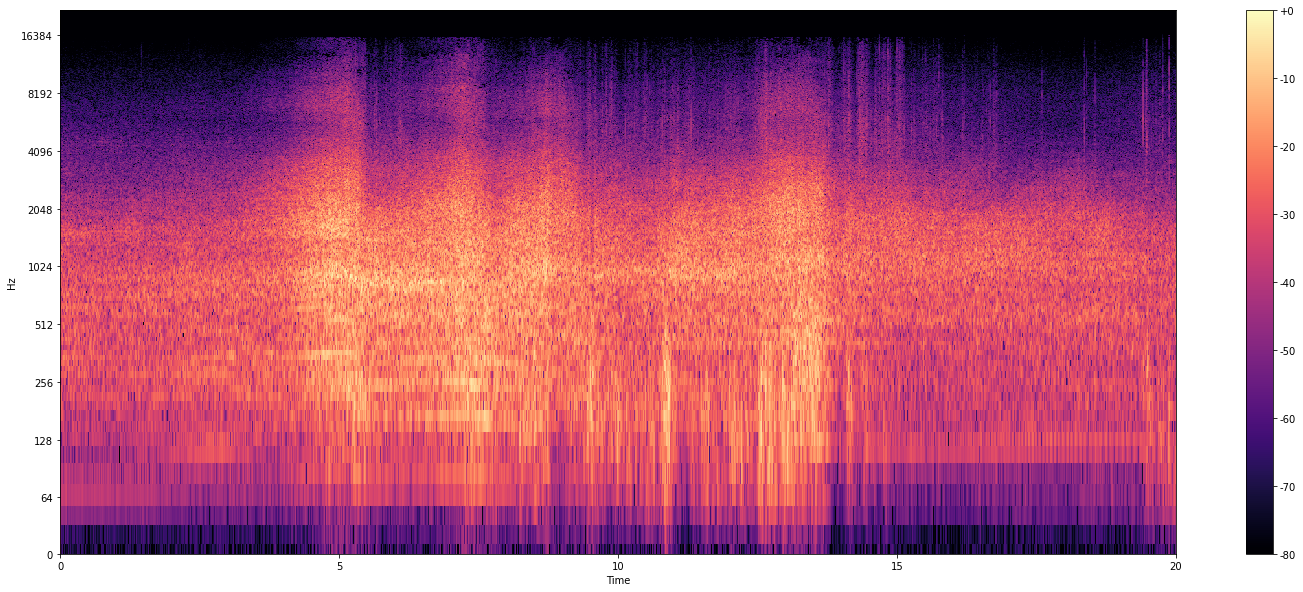

In [11]:
plot_spectrogram(y2, sr, 512)

In [12]:
f'{1 / sr:.6f} sec'

'0.000023 sec'

### Define constants

In [21]:
FRAME_LENGTH = 1024 * 16
HOP_LENGTH = 1024 * 8

FROM_TIME = 19 * 60 + 25
TILL_TIME = 19 * 60 + 45

FROM_TIME = 20 * 60 + 20
TILL_TIME = 20 * 60 + 35

### ZCR

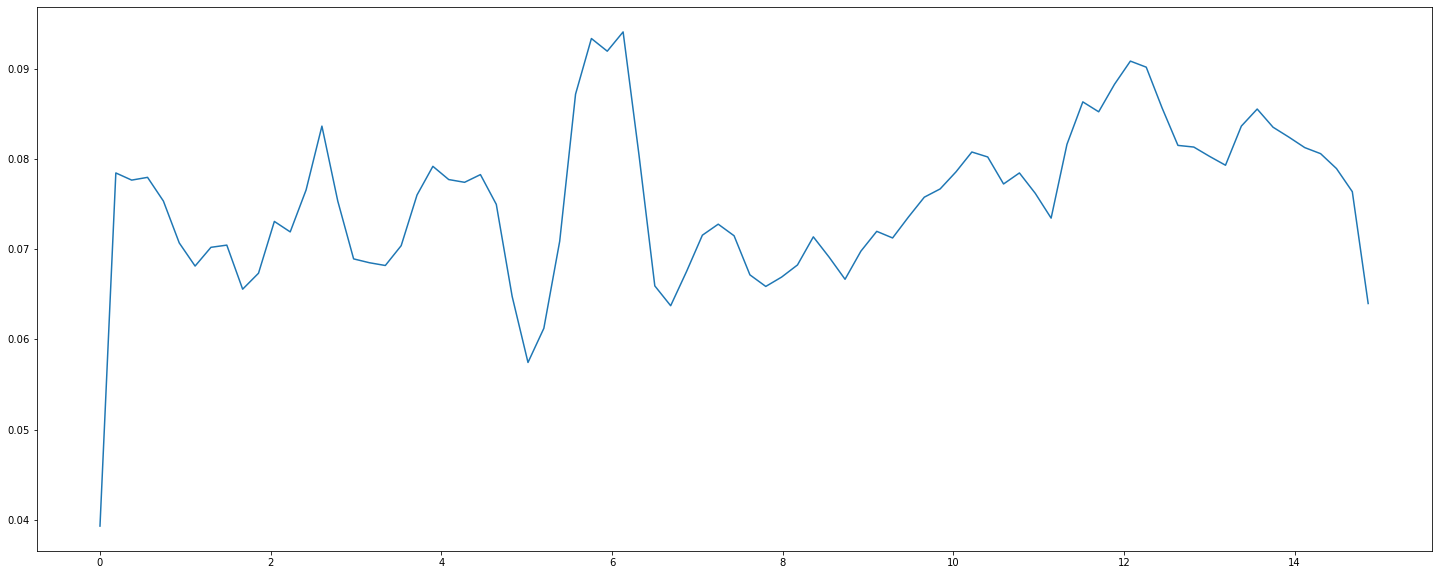

In [22]:
y1 = y[sr * FROM_TIME : sr * TILL_TIME]
zcr = librosa.feature.zero_crossing_rate(y1, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

frames = range(0, len(zcr))
t = librosa.frames_to_time(frames, sr=sr, hop_length=HOP_LENGTH)

plt.figure(figsize=(25, 10))
plt.plot(t, zcr);

### RMSE

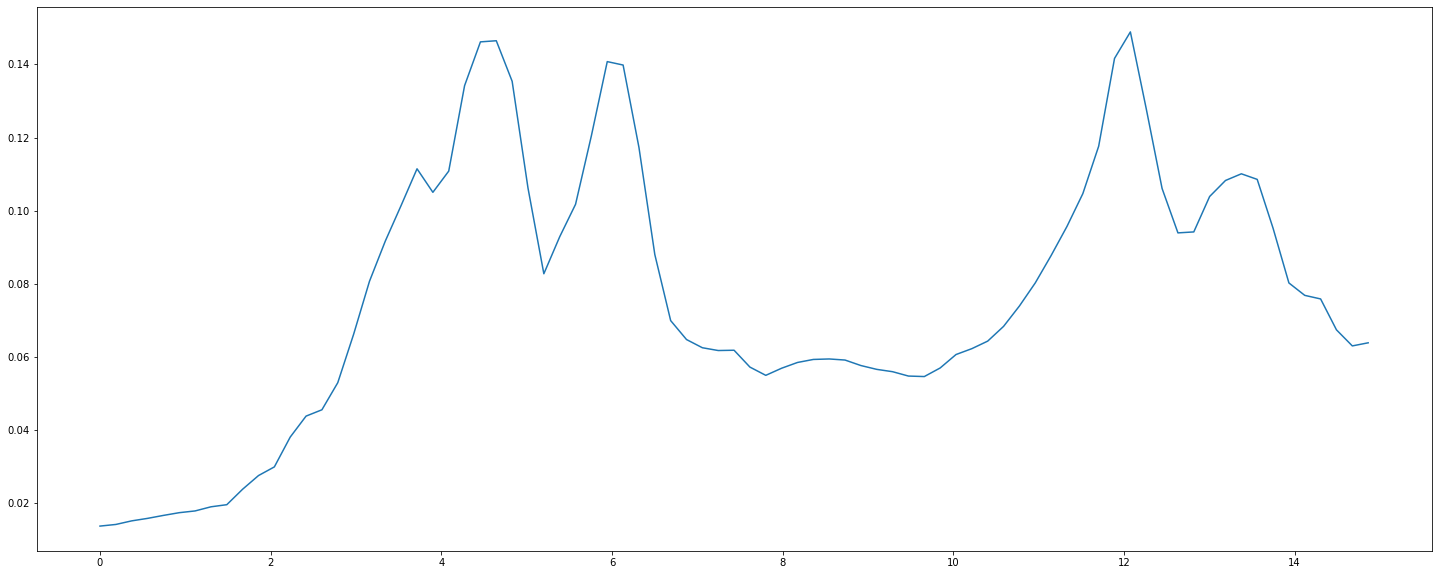

In [23]:
y1 = y[sr * FROM_TIME : sr * TILL_TIME]
# y1 = y
rms = librosa.feature.rms(y1, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

frames = range(0, len(rms))
t = librosa.frames_to_time(frames, sr=sr, hop_length=HOP_LENGTH)

plt.figure(figsize=(25, 10))
# plt.vlines(from_time, 0, 0.3, color='r')
# plt.vlines(till_time, 0, 0.3, color='r')
plt.plot(t, rms);

In [385]:
t[-1]

2067.3190022675735

In [386]:
rms > 0.2

array([False, False, False, ..., False, False, False])

In [401]:
counter = 0
th = 0.2
signal_on = False

for i in rms > th:
    if not i:
        signal_on = False
        
    if i:
        if signal_on:
            continue
            
        counter += 1
        signal_on = True
        

In [402]:
counter

125